Tomando en cuenta lo realizado en clase, diseñar el código para el funcionamiento del método de la bisección, éste debe de estar en una función.

Para encontrar la raiz de una funcion es necesario que los simbolos de cada valor obtenido sean diferentes, ya que con esto nosotros aseguramos que la "gráfica" cruza el plano en donde "y" es igual a 0 (raiz)

      Intervalo
|-------------------|
xl                 xu


xr es la mitar del intervalo en donde estan ubicados xl y xu, si tomamos a xr como otro punto que parte la recta, se generan dos valores nuevos (Δx/2) sumando estos dos valores obtenemos como resultado el valor de Δx (delta x) en donde Δx es igual a la diferencia de xu respecto a xl (Δx = xu - xl).

Hacemos esto con el fin de hacer mas pequeño nuestro intervalo y encontar de una manera mas exacta nuestra raiz.

Para saber hasta que punto tenemos que iterar el programa existe una formula en donde nosotros calculamos un error aproximado, tenemos que comparar el valor que obtuvimos en xr con el valor obtenido en la iteracion anterior, si este cumple con los valores solicitados es momento de parar.

Ea = |xr (nuevo) - xr (anterior) / xr (nuevo)|

Ejemplo:

f(x) = x^3 + 4x^2 - 10     intervalo [1,2]     Error aproximado = 0.0001

Formulas:
Δx = xu - xl
xr = xu + xl / 2
Ea = |xr (nuevo) - xr (anterior) / xr (nuevo)|

f(xl) = (1)^3 + 4(1)^2 - 10    ->  f(xl) = -5
f(xu) = (2)^3 + 4(2)^2 - 10    ->  f(xu) = 14

xr = 2 + 1 / 2      ->      xr = 1.5
f(xr) = (1.5)^3 + 4(1.5)^2 - 10    ->  f(xr) = 2.375

f(xl) = -5
            Esta mitad cumple con la condicion solicitada (signos diferentes)
f(xr) = 2.375
            Esta otra no
f(xu) = 14

Ya que sabemos en que lado del intervalo se encuentra nuestra raiz solo hay que repetir los pasos anteriores.
Hay que tomar en cuenta que nuestro nuevo intervalo sera de:

|------------------|
xl                xr             

xr se convertira en xu    ->    nuevo intervalo [1, 1.5]

Intervalo
1
2
Criterio de paro: 0.0001
xl:  1.0  -> f(xl):  -5.0 
xr:  1.5  -> f(xr):  2.375 
xu:  2.0  -> f(xu):  14.0
Nuevo intervalo:  1.0   1.5
xl:  1.0  -> f(xl):  -5.0 
xr:  1.25  -> f(xr):  -1.796875 
xu:  1.5  -> f(xu):  2.375
Nuevo intervalo:  1.25   1.5
xl:  1.25  -> f(xl):  -1.796875 
xr:  1.375  -> f(xr):  0.162109375 
xu:  1.5  -> f(xu):  2.375
Nuevo intervalo:  1.25   1.375
xl:  1.25  -> f(xl):  -1.796875 
xr:  1.3125  -> f(xr):  -0.848388671875 
xu:  1.375  -> f(xu):  0.162109375
Nuevo intervalo:  1.3125   1.375
xl:  1.3125  -> f(xl):  -0.848388671875 
xr:  1.34375  -> f(xr):  -0.350982666015625 
xu:  1.375  -> f(xu):  0.162109375
Nuevo intervalo:  1.34375   1.375
xl:  1.34375  -> f(xl):  -0.350982666015625 
xr:  1.359375  -> f(xr):  -0.09640884399414062 
xu:  1.375  -> f(xu):  0.162109375
Nuevo intervalo:  1.359375   1.375
xl:  1.359375  -> f(xl):  -0.09640884399414062 
xr:  1.3671875  -> f(xr):  0.03235578536987305 
xu:  1.375  -> f(xu):  0.162109375
Nuevo intervalo:  

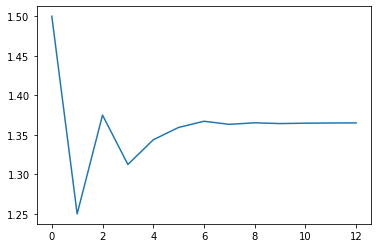

In [7]:
#   libreria para graficar -> variable plt
import matplotlib.pyplot as plt

def solicitar():
    lista = []
    print("Intervalo")
    for i in range(2):
        lista.append((input()))
    return lista

def solucion(x):
    fx = x**3 + 4*x**2 - 10
    return fx

def comprobar():
    if (solucion(xl) * solucion(xu) < 0):
        return True
    return False

def nuevointervalo():
    if (fxl * fxr < 0):
        nxl = xl
        nxu = xr
        print("Nuevo intervalo: ", nxl," " ,nxu)
    elif(fxr * fxu < 0):
        nxl = xr
        nxu = xu
        print("Nuevo intervalo: ", nxl," " ,nxu)
    return nxl, nxu

def mitad():
    m = (xu + xl) / 2
    #   guardamos m en registroxr para despues graficar
    registroxr.append(m)
    return m
#   registro de todos los xr calculados
registroxr = []
#   primer intervalo
intervalo = solicitar()
xl = float(intervalo[0])
xu = float(intervalo[1])
#   criterio de paro
Cp = abs(float(input("Criterio de paro: ")))
#   Ea -> valor a calcular y a comparar con el criterio de paro, igualado a una unidad solo para cumplir con la condicion del ciclo while
Ea = 1
#   True -> el procedimiento funciona
if (comprobar()):
    while (Ea > Cp):
        #   resultado de sustituir los valores del intervalo en la funcion
        fxl = solucion(xl)
        fxu = solucion(xu)
        #   mitad del intervalo
        xr = mitad()
        fxr = solucion(xr)
        print("xl: ", xl, " -> f(xl): ", fxl,"\nxr: ", xr, " -> f(xr): ", fxr, "\nxu: ", xu, " -> f(xu): ", fxu)
        #   nuevo intervalo
        xl, xu = nuevointervalo()

        if (len(registroxr) > 1):
            #   Error aceptado -> Ea = |xr (nuevo) - xr (anterior) / xr (nuevo)|
            Ea = abs(float((registroxr[-1] - registroxr[-2]) / registroxr[-1]))
    #   criterio de paro vs error aceptado
    print("Criterio de paro: ", Cp, "\nError aceptado: ", Ea)
    #   mostramos grafico con todos los xr almacenados en el proceso
    plt.plot(registroxr)
    plt.show()
#   False -> el procedimiento no funciona
else:
    print("Este intervalo no es valido")
